In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [38]:
# Preprocessing
from sklearn.preprocessing import Imputer, MinMaxScaler, StandardScaler

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# kNN
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# SVM
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix, r2_score, accuracy_score

In [5]:
plt.rcParams['figure.figsize'] = 5,3

In [6]:
def fun_plot_confusion_matrix(conf):
    cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
    sns.heatmap(conf,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [7]:
def fun_conf_mat_calc(conf):
    print('Overall Accuracy:', np.round(((conf.item(0) + conf.item(3)) / conf.sum()) * 100, 2))
    print('TPRate or Recall or Sensitivity i.e. (TP / Actual YES):', 
          np.round((conf.item(3) / (conf.item(2) + conf.item(3)))*100,2))
    print('FPRate i.e. (FP / Actyal NO):', 
          np.round((conf.item(1) / (conf.item(0) + conf.item(1)))*100,2))
    print('Specificity i.e. (TN / Actual NO):', 
          np.round((conf.item(0) / (conf.item(0) + conf.item(1)))*100,2))
    print('Precision i.e. (TP / Predicted YES):', 
          np.round((conf.item(3) / (conf.item(1) + conf.item(3)))*100,2))

In [235]:
def fun_Y_df_col_value_counts():
    for i in Y_df.columns:
        print(i)
        print(Y_df[i].value_counts())
        print('\n')

In [8]:
path = 'Z:/Career/DataScientist/UPx/Projects/Suchit_Project_ML_Datasets/Telecom_churn/'

telData = pd.read_csv(path + 'telecom_churn_data.txt', delimiter= ',', header = None)
telData.columns = ['State', 'Acc_Len', 'Area_Cd', 'Phn', 'Intl_Plan', 'VMail_Plan', 'Vmail_Msg', 
                   'Day_Mins', 'Day_Calls', 'Day_Chg', 'Eve_Mins', 'Eve_Calls', 'Eve_Chg', 
                   'Ngt_Mins', 'Ngt_Calls', 'Ngt_Chg', 'Intl_Mins', 'Intl_Calls', 'Intl_Chg', 
                   'CustServ_Calls', 'Churn']

In [9]:
telData_copy = telData.copy()

In [10]:
telData_copy.tail()

,State,Acc_Len,Area_Cd,Phn,Intl_Plan,VMail_Plan,Vmail_Msg,Day_Mins,Day_Calls,Day_Chg,...,Eve_Calls,Eve_Chg,Ngt_Mins,Ngt_Calls,Ngt_Chg,Intl_Mins,Intl_Calls,Intl_Chg,CustServ_Calls,Churn
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.80,...,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [11]:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [12]:
print(telData_copy.shape,'\n')
print(telData_copy.ndim,'\n')
print(telData_copy.dtypes)

(4617, 21) 

2 

State              object
Acc_Len             int64
Area_Cd             int64
Phn                object
Intl_Plan          object
VMail_Plan         object
Vmail_Msg           int64
Day_Mins          float64
Day_Calls           int64
Day_Chg           float64
Eve_Mins          float64
Eve_Calls           int64
Eve_Chg           float64
Ngt_Mins          float64
Ngt_Calls           int64
Ngt_Chg           float64
Intl_Mins         float64
Intl_Calls          int64
Intl_Chg          float64
CustServ_Calls      int64
Churn              object
dtype: object


In [13]:
#telData.info()
np.round(telData_copy.describe(),2)

,Acc_Len,Area_Cd,Vmail_Msg,Day_Mins,Day_Calls,Day_Chg,Eve_Mins,Eve_Calls,Eve_Chg,Ngt_Mins,Ngt_Calls,Ngt_Chg,Intl_Mins,Intl_Calls,Intl_Chg,CustServ_Calls
count,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00
mean,100.65,437.05,7.85,180.45,100.05,30.68,200.43,100.18,17.04,200.62,99.94,9.03,10.28,4.43,2.78,1.57
std,39.60,42.29,13.59,53.98,19.88,9.18,50.56,19.82,4.30,50.54,19.94,2.27,2.76,2.46,0.74,1.31
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,12.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,165.90,87.00,14.10,167.10,87.00,7.52,8.60,3.00,2.32,1.00
50%,100.00,415.00,0.00,180.00,100.00,30.60,200.80,101.00,17.07,200.80,100.00,9.04,10.30,4.00,2.78,1.00
75%,127.00,510.00,17.00,216.80,113.00,36.86,234.00,114.00,19.89,234.90,113.00,10.57,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,351.50,165.00,59.76,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [14]:
# Get total unique States
print(len(telData_copy.State.value_counts().sort_index()))

# Check all States
telData_copy.State.value_counts().sort_index()

51


AK     69
AL    114
AR     77
AZ     81
CA     44
CO     91
CT     92
DC     82
DE     89
FL     85
GA     77
HI     79
IA     65
ID    110
IL     79
IN     89
KS     96
KY     90
LA     73
MA     97
MD     92
ME     95
MI     98
MN    112
MO     84
MS     91
MT     92
NC     83
ND     80
NE     79
NH     91
NJ    106
NM     84
NV     89
NY    109
OH    110
OK     80
OR    107
PA     68
RI     90
SC     83
SD     76
TN     83
TX    105
UT    104
VA    109
VT     95
WA     89
WI     99
WV    149
WY    106
Name: State, dtype: int64

In [15]:
# Checking NULL
telData_copy.isnull().sum()

State             0
Acc_Len           0
Area_Cd           0
Phn               0
Intl_Plan         0
VMail_Plan        0
Vmail_Msg         0
Day_Mins          0
Day_Calls         0
Day_Chg           0
Eve_Mins          0
Eve_Calls         0
Eve_Chg           0
Ngt_Mins          0
Ngt_Calls         0
Ngt_Chg           0
Intl_Mins         0
Intl_Calls        0
Intl_Chg          0
CustServ_Calls    0
Churn             0
dtype: int64

No Null records

In [16]:
telData_copy.Churn.value_counts()

 False.    3961
 True.      656
Name: Churn, dtype: int64

In [17]:
telData_copy.Churn.replace(' False.', 'F', inplace= True)
telData_copy.Churn.replace(' True.', 'T', inplace= True)

In [18]:
telData_copy.Churn.value_counts().sort_index()

F    3961
T     656
Name: Churn, dtype: int64

In [19]:
telData_copy.Intl_Plan.value_counts()

 no     4171
 yes     446
Name: Intl_Plan, dtype: int64

In [20]:
telData_copy.Intl_Plan.replace(' no', 'no', inplace=True)
telData_copy.Intl_Plan.replace(' yes', 'yes', inplace=True)

In [21]:
telData_copy.Intl_Plan.value_counts()

no     4171
yes     446
Name: Intl_Plan, dtype: int64

In [22]:
telData_copy.VMail_Plan.value_counts()

 no     3381
 yes    1236
Name: VMail_Plan, dtype: int64

In [23]:
telData_copy.VMail_Plan.replace(' no', 'no', inplace= True)
telData_copy.VMail_Plan.replace(' yes', 'yes', inplace= True)

In [24]:
telData_copy.VMail_Plan.value_counts()

no     3381
yes    1236
Name: VMail_Plan, dtype: int64

In [29]:
telData_copy.dtypes

State              object
Acc_Len             int64
Area_Cd             int64
Phn                object
Intl_Plan          object
VMail_Plan         object
Vmail_Msg           int64
Day_Mins          float64
Day_Calls           int64
Day_Chg           float64
Eve_Mins          float64
Eve_Calls           int64
Eve_Chg           float64
Ngt_Mins          float64
Ngt_Calls           int64
Ngt_Chg           float64
Intl_Mins         float64
Intl_Calls          int64
Intl_Chg          float64
CustServ_Calls      int64
Churn              object
dtype: object

In [33]:
for i in telData_copy.columns:
    i, len(telData_copy[i].value_counts().sort_index())
    telData_copy[i].value_counts().sort_index()

('State', 51)

AK     69
AL    114
AR     77
AZ     81
CA     44
CO     91
CT     92
DC     82
DE     89
FL     85
GA     77
HI     79
IA     65
ID    110
IL     79
IN     89
KS     96
KY     90
LA     73
MA     97
MD     92
ME     95
MI     98
MN    112
MO     84
MS     91
MT     92
NC     83
ND     80
NE     79
NH     91
NJ    106
NM     84
NV     89
NY    109
OH    110
OK     80
OR    107
PA     68
RI     90
SC     83
SD     76
TN     83
TX    105
UT    104
VA    109
VT     95
WA     89
WI     99
WV    149
WY    106
Name: State, dtype: int64

('Acc_Len', 218)

1      10
2       1
3       8
4       3
5       2
6       2
7       4
8       2
9       3
10      3
11      6
12      5
13     10
14      1
15      4
16      8
17      6
18      3
19      8
20      4
21     10
22      8
23      5
24      9
25     11
26      3
27     10
28      8
29      9
30      8
       ..
189     6
190     8
191     1
192     4
193     6
194     5
195     3
196     2
197     3
199     1
200     1
201     4
202     1
204     2
205     2
208     1
209     3
210     2
212     2
215     1
216     1
217     2
221     1
222     1
224     2
225     2
232     2
233     1
238     1
243     1
Name: Acc_Len, Length: 218, dtype: int64

('Area_Cd', 3)

408    1161
415    2299
510    1157
Name: Area_Cd, dtype: int64

('Phn', 4617)

 327-1058    1
 327-1319    1
 327-2040    1
 327-2475    1
 327-3053    1
 327-3587    1
 327-3850    1
 327-3954    1
 327-4579    1
 327-4795    1
 327-5525    1
 327-5816    1
 327-5817    1
 327-6087    1
 327-6179    1
 327-6194    1
 327-6764    1
 327-6947    1
 327-6989    1
 327-7615    1
 327-8495    1
 327-8514    1
 327-8732    1
 327-9289    1
 327-9341    1
 327-9613    1
 327-9957    1
 328-1206    1
 328-1222    1
 328-1373    1
            ..
 421-8537    1
 421-9034    1
 421-9144    1
 421-9401    1
 421-9683    1
 421-9747    1
 421-9752    1
 421-9846    1
 422-1471    1
 422-1799    1
 422-2571    1
 422-3052    1
 422-3454    1
 422-4241    1
 422-4394    1
 422-4956    1
 422-5264    1
 422-5350    1
 422-5865    1
 422-5874    1
 422-6685    1
 422-6690    1
 422-7728    1
 422-8152    1
 422-8268    1
 422-8333    1
 422-8344    1
 422-8472    1
 422-9831    1
 422-9964    1
Name: Phn, Length: 4617, dtype: int64

('Intl_Plan', 2)

no     4171
yes     446
Name: Intl_Plan, dtype: int64

('VMail_Plan', 2)

no     3381
yes    1236
Name: VMail_Plan, dtype: int64

('Vmail_Msg', 47)

0     3381
4        1
6        2
8        2
9        2
10       4
11       2
12      10
13       4
14       9
15      12
16      16
17      18
18      14
19      26
20      30
21      40
22      45
23      48
24      57
25      49
26      55
27      57
28      62
29      64
30      54
31      80
32      52
33      61
34      39
35      40
36      45
37      42
38      37
39      40
40      26
41      21
42      19
43      13
44       7
45      10
46       8
47       4
48       3
49       3
50       2
51       1
Name: Vmail_Msg, dtype: int64

('Day_Mins', 1901)

0.0      2
2.6      1
7.8      1
7.9      1
12.5     1
17.6     1
18.9     1
19.5     1
25.9     1
27.0     1
29.9     1
30.9     1
34.0     1
35.1     1
37.7     1
37.8     1
39.5     1
40.4     1
40.9     1
41.2     1
41.9     1
42.1     1
44.9     1
45.0     1
46.5     1
47.4     1
47.7     1
47.8     1
48.4     2
49.2     1
        ..
314.1    1
314.6    1
315.6    1
317.1    1
317.8    1
321.1    1
321.3    1
321.6    1
322.3    2
322.4    1
322.5    1
324.3    1
324.7    1
325.4    1
325.5    1
326.1    1
326.3    1
326.5    1
328.1    1
329.8    1
332.1    1
332.9    1
334.3    1
335.5    1
337.4    1
338.4    1
345.3    1
346.8    1
350.8    1
351.5    1
Name: Day_Mins, Length: 1901, dtype: int64

('Day_Calls', 123)

0       2
30      1
34      1
35      1
36      1
39      1
40      2
42      2
44      4
45      3
46      1
47      3
48      4
49      2
50      1
51      5
52      6
53      5
54      7
55      7
56      9
57     12
58     10
59      9
60     13
61     19
62     11
63     18
64     11
65     25
       ..
129    29
130    29
131    18
132    21
133    27
134    27
135    13
136    11
137    16
138    18
139    10
140    14
141    18
142    11
143    10
144     7
145    10
146     6
147     8
148     6
149     2
150     6
151     7
152     2
156     3
157     2
158     3
160     2
163     1
165     1
Name: Day_Calls, Length: 123, dtype: int64

('Day_Chg', 1901)

0.00     2
0.44     1
1.33     1
1.34     1
2.13     1
2.99     1
3.21     1
3.32     1
4.40     1
4.59     1
5.08     1
5.25     1
5.78     1
5.97     1
6.41     1
6.43     1
6.72     1
6.87     1
6.95     1
7.00     1
7.12     1
7.16     1
7.63     1
7.65     1
7.91     1
8.06     1
8.11     1
8.13     1
8.23     2
8.36     1
        ..
53.40    1
53.48    1
53.65    1
53.91    1
54.03    1
54.59    1
54.62    1
54.67    1
54.79    2
54.81    1
54.83    1
55.13    1
55.20    1
55.32    1
55.34    1
55.44    1
55.47    1
55.51    1
55.78    1
56.07    1
56.46    1
56.59    1
56.83    1
57.04    1
57.36    1
57.53    1
58.70    1
58.96    1
59.64    1
59.76    1
Name: Day_Chg, Length: 1901, dtype: int64

('Eve_Mins', 1833)

0.0      1
22.3     1
31.2     1
37.8     1
41.7     1
42.2     1
42.5     1
43.9     1
47.3     1
48.1     1
49.2     1
52.9     1
53.2     1
56.0     1
58.3     1
58.6     1
58.9     1
60.0     1
60.8     1
61.9     1
64.3     1
65.2     1
66.0     1
66.5     1
67.0     1
67.5     1
69.2     1
70.9     1
71.0     1
72.9     1
        ..
327.0    2
327.1    1
328.2    1
328.7    1
329.3    1
329.8    1
330.6    1
331.3    1
332.1    1
332.8    1
334.1    1
335.0    1
335.7    1
336.0    1
337.1    1
339.9    1
341.3    1
344.0    1
344.9    1
347.3    1
348.5    1
348.9    1
349.4    1
350.5    1
350.9    1
351.6    1
352.1    1
354.2    1
361.8    1
363.7    1
Name: Eve_Mins, Length: 1833, dtype: int64

('Eve_Calls', 125)

0       1
12      1
36      1
37      1
42      1
43      1
44      1
45      1
46      5
47      2
48      6
49      1
50      4
51      6
52      5
53      6
54      7
55      4
56     10
57      4
58     13
59      8
60     14
61     14
62     16
63     16
64     19
65     27
66     16
67     26
       ..
133    24
134    21
135    11
136    25
137    14
138    17
139     9
140    11
141     9
142    15
143    13
144    10
145     4
146     5
147     7
148     4
149     7
150     6
151     4
152     8
153     1
154     4
155     5
156     1
157     1
159     1
164     1
168     1
169     1
170     1
Name: Eve_Calls, Length: 125, dtype: int64

('Eve_Chg', 1621)

0.00     1
1.90     1
2.65     1
3.21     1
3.54     1
3.59     1
3.61     1
3.73     1
4.02     1
4.09     1
4.18     1
4.50     1
4.52     1
4.76     1
4.96     1
4.98     1
5.01     1
5.10     1
5.17     1
5.26     1
5.47     1
5.54     1
5.61     1
5.65     1
5.70     1
5.74     1
5.88     1
6.03     1
6.04     1
6.20     1
        ..
27.72    1
27.80    3
27.90    1
27.94    1
27.99    1
28.03    1
28.10    1
28.16    1
28.23    1
28.29    1
28.40    1
28.48    1
28.53    1
28.56    1
28.65    1
28.89    1
29.01    1
29.24    1
29.32    1
29.52    1
29.62    1
29.66    1
29.70    1
29.79    1
29.83    1
29.89    1
29.93    1
30.11    1
30.75    1
30.91    1
Name: Eve_Chg, Length: 1621, dtype: int64

('Ngt_Mins', 1813)

23.2     1
43.7     1
45.0     1
46.7     1
47.4     1
50.1     2
50.9     1
53.3     1
54.0     1
54.5     1
56.6     1
57.5     1
59.5     1
61.4     1
63.3     1
63.6     1
64.2     1
65.2     1
65.7     1
65.8     1
67.1     1
67.7     1
70.6     1
71.1     2
72.2     1
72.4     1
73.2     2
73.7     1
75.3     1
75.8     1
        ..
325.9    1
326.0    1
326.4    1
328.5    1
328.8    1
329.2    2
329.3    1
332.2    1
332.7    1
332.8    1
333.5    2
334.7    1
336.1    1
342.8    1
344.3    1
345.8    1
349.2    1
349.7    1
350.2    1
352.2    1
352.5    1
354.9    1
359.9    1
364.3    1
364.9    1
367.7    1
377.5    1
381.6    1
381.9    1
395.0    1
Name: Ngt_Mins, Length: 1813, dtype: int64

('Ngt_Calls', 130)

12      1
33      1
36      1
38      2
40      1
41      1
42      4
43      1
44      1
46      3
48      2
49      4
50      5
51      2
52      4
53     10
54      3
55      7
56      7
57     10
58      9
59     12
60     12
61     16
62     10
63     16
64     17
65     25
66     19
67     28
       ..
138    12
139    16
140    12
141    11
142     6
143     7
144     4
145     9
146     8
147     6
148     6
149     2
150     4
151     7
152     3
153     3
154     3
155     4
156     2
157     2
158     2
159     2
160     1
161     1
164     1
165     1
166     1
168     1
170     1
175     1
Name: Ngt_Calls, Length: 130, dtype: int64

('Ngt_Chg', 1012)

1.04     1
1.97     1
2.03     1
2.10     1
2.13     1
2.25     2
2.29     1
2.40     1
2.43     1
2.45     1
2.55     1
2.59     1
2.68     1
2.76     1
2.85     1
2.86     1
2.89     1
2.93     1
2.96     2
3.02     1
3.05     1
3.18     1
3.20     2
3.25     1
3.26     1
3.29     2
3.32     1
3.39     1
3.41     1
3.44     3
        ..
14.65    2
14.67    2
14.69    1
14.78    1
14.80    1
14.81    2
14.82    1
14.95    1
14.97    1
14.98    1
15.01    2
15.06    1
15.12    1
15.43    1
15.49    1
15.56    1
15.71    1
15.74    1
15.76    1
15.85    1
15.86    1
15.97    1
16.20    1
16.39    1
16.42    1
16.55    1
16.99    1
17.17    1
17.19    1
17.77    1
Name: Ngt_Chg, Length: 1012, dtype: int64

('Intl_Mins', 168)

0.0     23
0.4      1
1.1      1
1.3      1
2.0      2
2.1      2
2.2      2
2.4      1
2.5      1
2.6      1
2.7      1
2.9      2
3.1      2
3.3      2
3.4      1
3.5      4
3.6      2
3.7      5
3.8      6
3.9      3
4.0      2
4.1      4
4.2      9
4.3      5
4.4      7
4.5      7
4.6      9
4.7      8
4.8      5
4.9      8
        ..
15.8     7
15.9     5
16.0     4
16.1     9
16.2     6
16.3     4
16.4     6
16.5     5
16.6     6
16.7     3
16.8     3
16.9     5
17.0     4
17.1     1
17.2     3
17.3     3
17.5     3
17.6     2
17.8     3
17.9     1
18.0     3
18.2     2
18.3     1
18.4     1
18.7     1
18.9     2
19.2     1
19.3     1
19.7     1
20.0     1
Name: Intl_Mins, Length: 168, dtype: int64

('Intl_Calls', 21)

0      23
1     245
2     680
3     925
4     881
5     646
6     460
7     283
8     156
9     141
10     70
11     38
12     21
13     19
14      6
15      9
16      6
17      1
18      4
19      2
20      1
Name: Intl_Calls, dtype: int64

('Intl_Chg', 168)

0.00    23
0.11     1
0.30     1
0.35     1
0.54     2
0.57     2
0.59     2
0.65     1
0.68     1
0.70     1
0.73     1
0.78     2
0.84     2
0.89     2
0.92     1
0.95     4
0.97     2
1.00     5
1.03     6
1.05     3
1.08     2
1.11     4
1.13     9
1.16     5
1.19     7
1.22     7
1.24     9
1.27     8
1.30     5
1.32     8
        ..
4.27     7
4.29     5
4.32     4
4.35     9
4.37     6
4.40     4
4.43     6
4.46     5
4.48     6
4.51     3
4.54     3
4.56     5
4.59     4
4.62     1
4.64     3
4.67     3
4.73     3
4.75     2
4.81     3
4.83     1
4.86     3
4.91     2
4.94     1
4.97     1
5.05     1
5.10     2
5.18     1
5.21     1
5.32     1
5.40     1
Name: Intl_Chg, Length: 168, dtype: int64

('CustServ_Calls', 10)

0     951
1    1651
2    1031
3     616
4     234
5      89
6      28
7      13
8       2
9       2
Name: CustServ_Calls, dtype: int64

('Churn', 2)

F    3961
T     656
Name: Churn, dtype: int64

'Area_Cd'

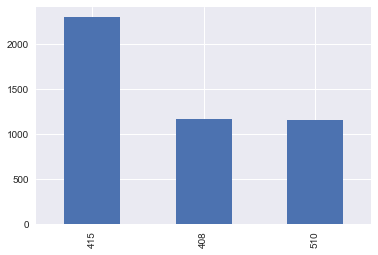

'Intl_Plan'

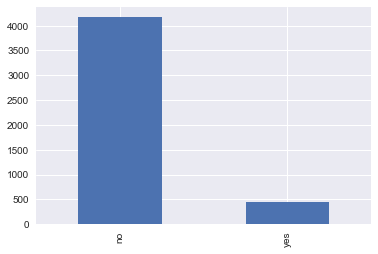

'VMail_Plan'

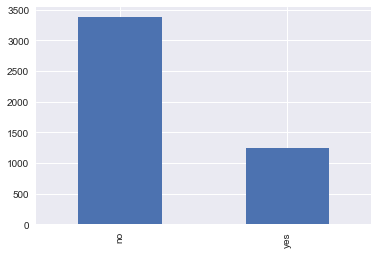

'CustServ_Calls'

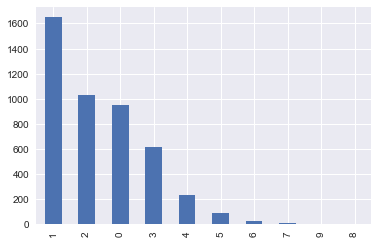

'Churn'

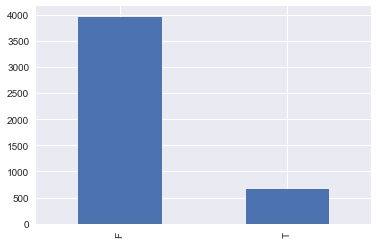

In [41]:
plt.rcParams['figure.figsize'] = 6,4
for i in ['Area_Cd', 'Intl_Plan', 'VMail_Plan', 'CustServ_Calls', 'Churn']:
    i
    telData_copy[i].value_counts().plot.bar()
    plt.show()

In [77]:
telData_copy.dtypes
len(telData_copy.dtypes)
telData_copy.columns[telData_copy.dtypes != 'object']
len(telData_copy.columns[telData_copy.dtypes != 'object'])
telData_copy.columns[telData_copy.dtypes == 'object']

State              object
Acc_Len             int64
Area_Cd             int64
Phn                object
Intl_Plan          object
VMail_Plan         object
Vmail_Msg           int64
Day_Mins          float64
Day_Calls           int64
Day_Chg           float64
Eve_Mins          float64
Eve_Calls           int64
Eve_Chg           float64
Ngt_Mins          float64
Ngt_Calls           int64
Ngt_Chg           float64
Intl_Mins         float64
Intl_Calls          int64
Intl_Chg          float64
CustServ_Calls      int64
Churn              object
dtype: object

21

Index(['Acc_Len', 'Area_Cd', 'Vmail_Msg', 'Day_Mins', 'Day_Calls', 'Day_Chg',
       'Eve_Mins', 'Eve_Calls', 'Eve_Chg', 'Ngt_Mins', 'Ngt_Calls', 'Ngt_Chg',
       'Intl_Mins', 'Intl_Calls', 'Intl_Chg', 'CustServ_Calls'],
      dtype='object')

16

Index(['State', 'Phn', 'Intl_Plan', 'VMail_Plan', 'Churn'], dtype='object')

'Acc_Len'

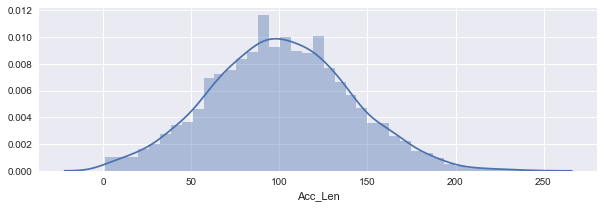

'Area_Cd'

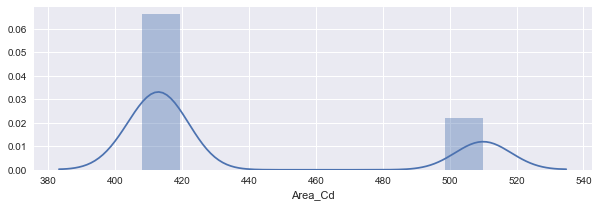

'Vmail_Msg'

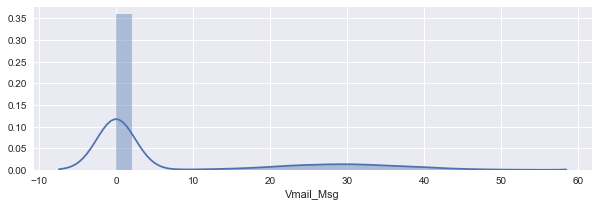

'Day_Mins'

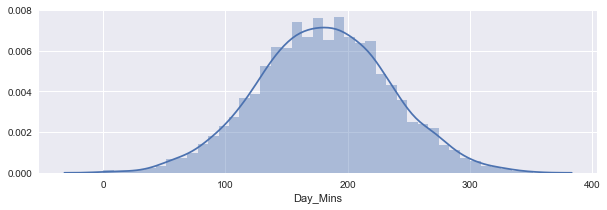

'Day_Calls'

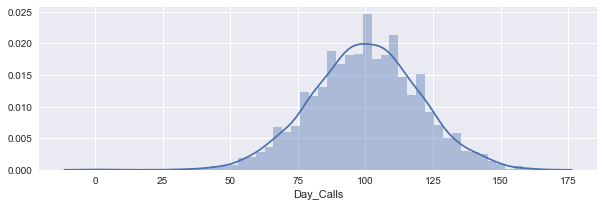

'Day_Chg'

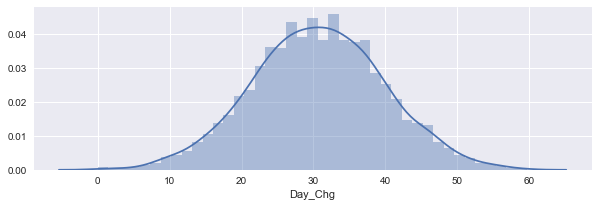

'Eve_Mins'

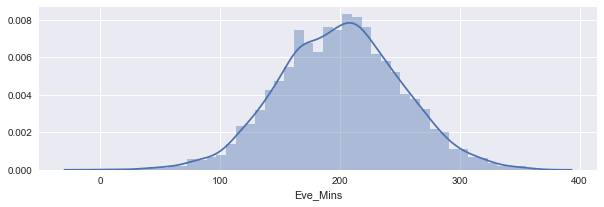

'Eve_Calls'

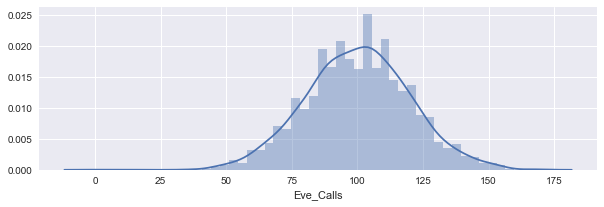

'Eve_Chg'

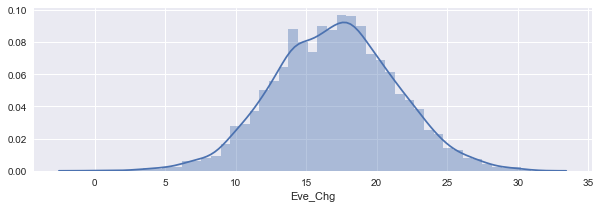

'Ngt_Mins'

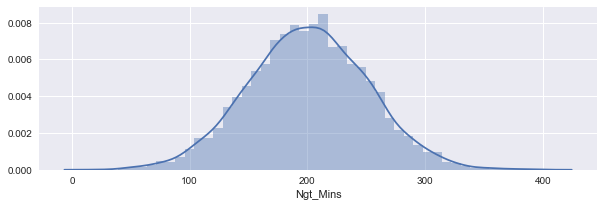

'Ngt_Calls'

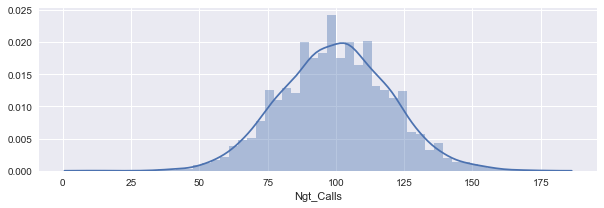

'Ngt_Chg'

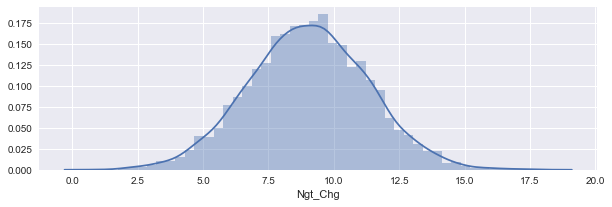

'Intl_Mins'

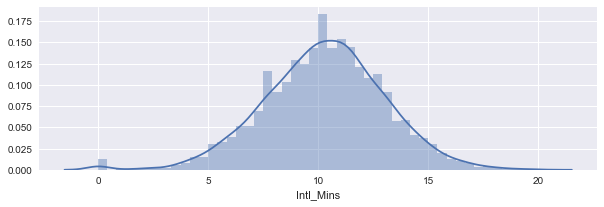

'Intl_Calls'

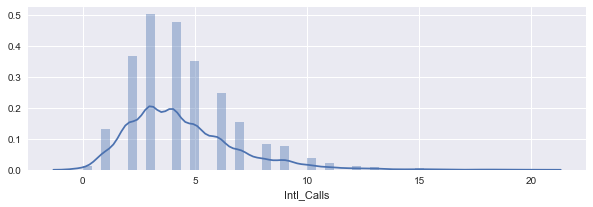

'Intl_Chg'

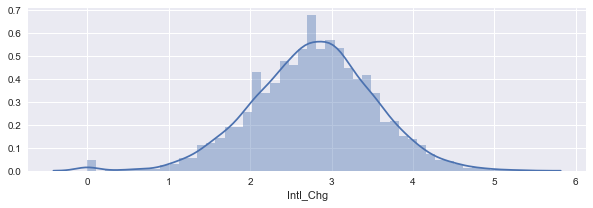

'CustServ_Calls'

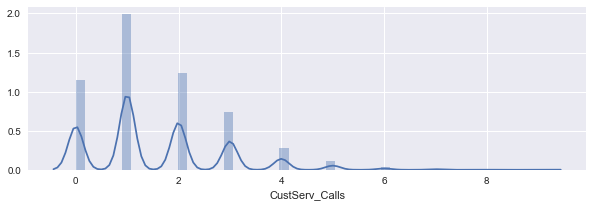

In [78]:
# Distribution of all Numeric Features
plt.rcParams['figure.figsize'] = 10,3
for i in telData_copy.columns[telData_copy.dtypes != 'object']:
    i
    sns.distplot(telData_copy[i])
    plt.show()

'Acc_Len'

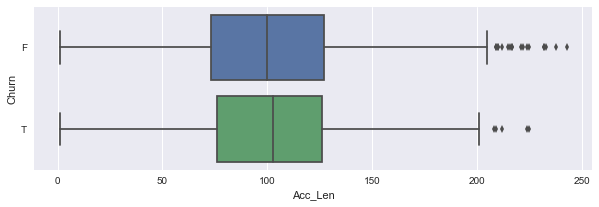

'Area_Cd'

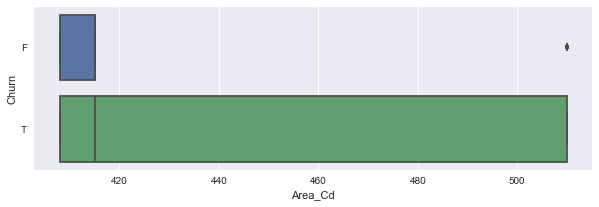

'Vmail_Msg'

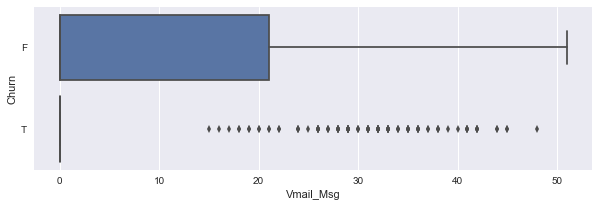

'Day_Mins'

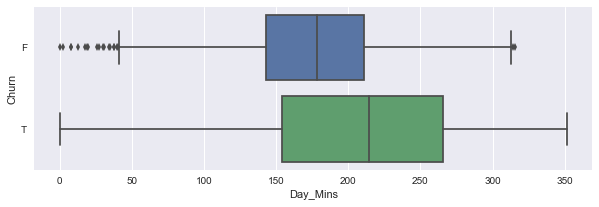

'Day_Calls'

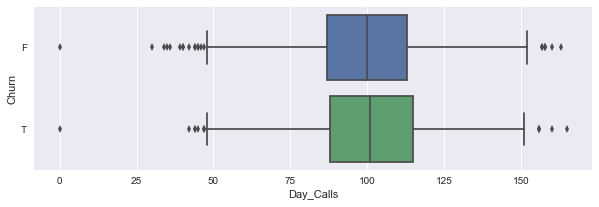

'Day_Chg'

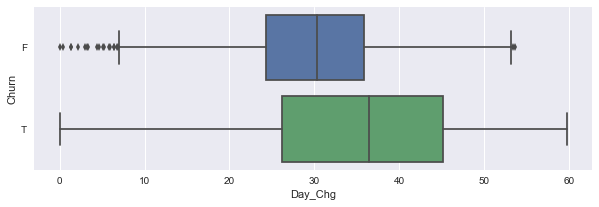

'Eve_Mins'

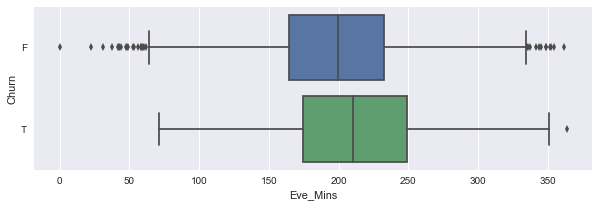

'Eve_Calls'

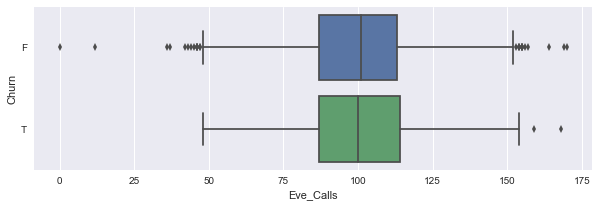

'Eve_Chg'

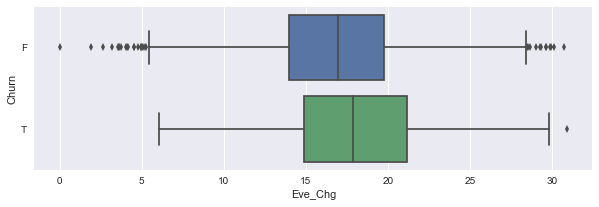

'Ngt_Mins'

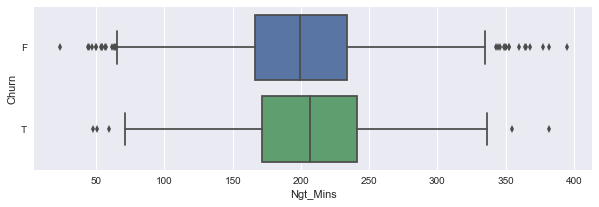

'Ngt_Calls'

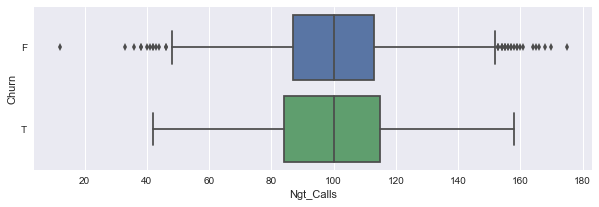

'Ngt_Chg'

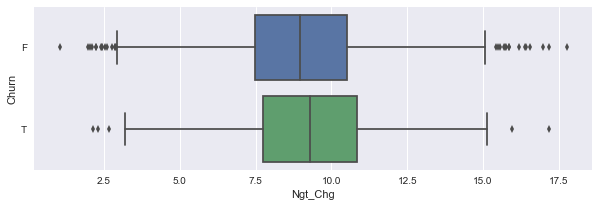

'Intl_Mins'

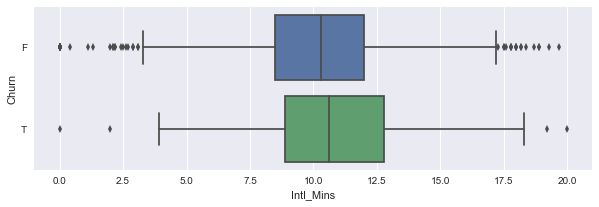

'Intl_Calls'

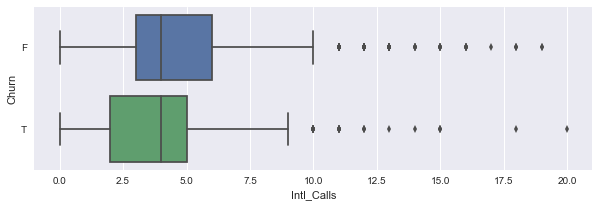

'Intl_Chg'

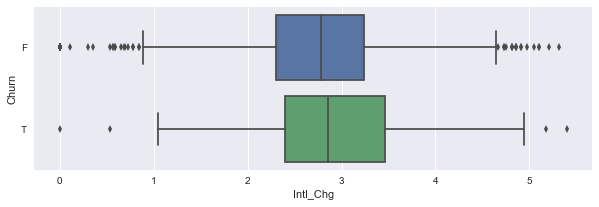

'CustServ_Calls'

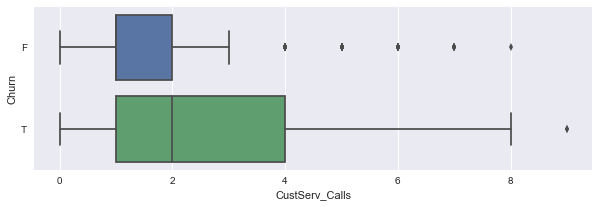

In [79]:
# Boxplot for all Numerci features w.r.t. Churn as target variable
plt.rcParams['figure.figsize'] = 10,3
for i in telData_copy.columns[telData_copy.dtypes != 'object']:
    i
    sns.boxplot(x=i, y='Churn', data=telData_copy)
    plt.show()

In [82]:
# Columns not needed
colToDrop = ['State', 'Acc_Len', 'Area_Cd', 'Phn']

In [83]:
telData_final = telData_copy.drop(colToDrop, axis=1)

In [84]:
telData_final.columns

Index(['Intl_Plan', 'VMail_Plan', 'Vmail_Msg', 'Day_Mins', 'Day_Calls',
       'Day_Chg', 'Eve_Mins', 'Eve_Calls', 'Eve_Chg', 'Ngt_Mins', 'Ngt_Calls',
       'Ngt_Chg', 'Intl_Mins', 'Intl_Calls', 'Intl_Chg', 'CustServ_Calls',
       'Churn'],
      dtype='object')

In [22]:
telData_final.tail()

,Intl_Plan,VMail_Plan,Vmail_Msg,Day_Mins,Day_Calls,Day_Chg,Eve_Mins,Eve_Calls,Eve_Chg,Ngt_Mins,Ngt_Calls,Ngt_Chg,Intl_Mins,Intl_Calls,Intl_Chg,CustServ_Calls,Churn
4612,no,yes,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,F
4613,no,yes,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,F
4614,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,F
4615,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,F
4616,no,no,0,204.7,100,34.80,126.8,107,10.78,202.8,115,9.13,12.1,4,3.27,2,F


Only 2 columns besides Churn are now Categorical - Intl_Plan and VMail_Plan : will also convert these into numeric

In [86]:
col_object = ['Intl_Plan', 'VMail_Plan', 'Churn']

In [87]:
telData_final = pd.get_dummies(telData_final, columns=col_object, drop_first=True)

In [88]:
telData_final.sample(4, random_state=5)

,Vmail_Msg,Day_Mins,Day_Calls,Day_Chg,Eve_Mins,Eve_Calls,Eve_Chg,Ngt_Mins,Ngt_Calls,Ngt_Chg,Intl_Mins,Intl_Calls,Intl_Chg,CustServ_Calls,Intl_Plan_yes,VMail_Plan_yes,Churn_T
4398,0,200.7,151,34.12,290.8,127,24.72,186.7,105,8.40,10.2,9,2.75,1,0,0,0
2515,0,123.1,88,20.93,213.9,84,18.18,184.9,88,8.32,12.0,2,3.24,5,0,0,1
1712,0,174.5,73,29.67,213.7,114,18.16,164.7,116,7.41,10.3,5,2.78,4,0,0,0
1036,32,142.6,77,24.24,208.2,126,17.70,171.0,102,7.69,12.0,2,3.24,3,0,1,0


All columns are now Integer/Float

'Vmail_Msg'

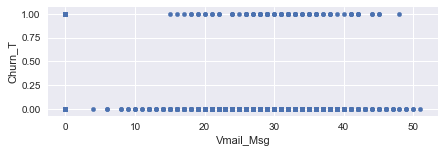

'Day_Mins'

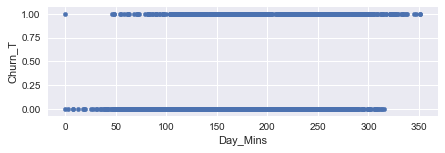

'Day_Calls'

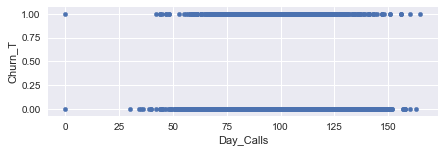

'Day_Chg'

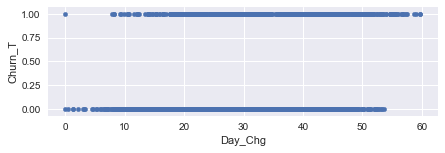

'Eve_Mins'

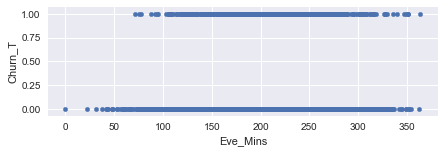

'Eve_Calls'

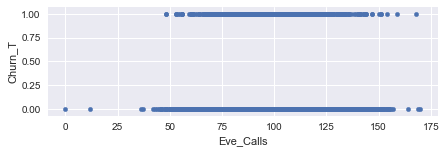

'Eve_Chg'

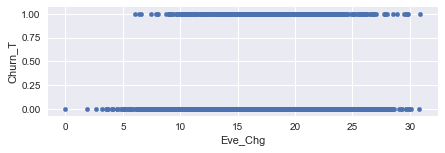

'Ngt_Mins'

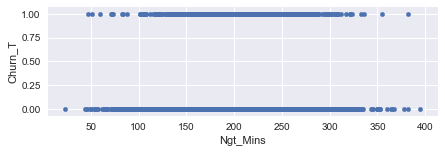

'Ngt_Calls'

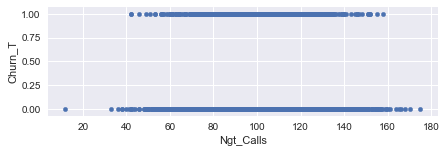

'Ngt_Chg'

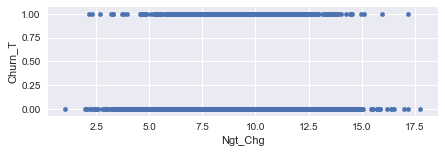

'Intl_Mins'

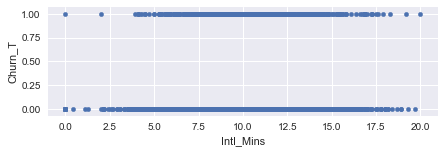

'Intl_Calls'

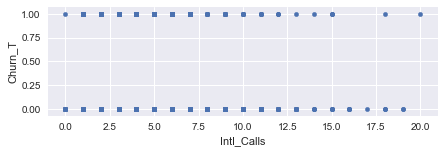

'Intl_Chg'

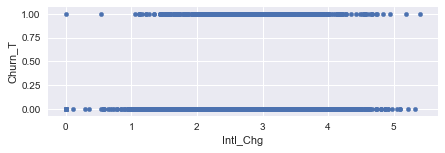

'CustServ_Calls'

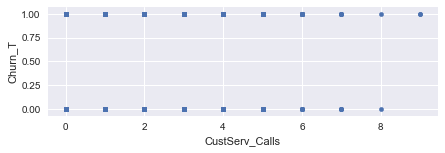

'Intl_Plan_yes'

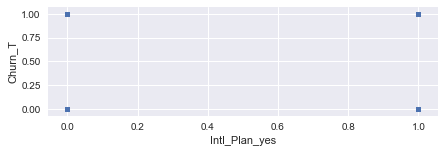

'VMail_Plan_yes'

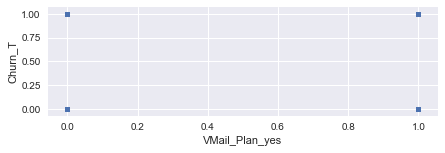

In [96]:
# Scatter plot w.r.t. Churn for all other Variables
plt.rcParams['figure.figsize'] = 7,2
for i in telData_final.columns[:-1]:
    i
    telData_final.plot(kind='scatter', x=i, y='Churn_T')
    plt.show()

In [97]:
np.round(telData_final.describe(),3)

,Vmail_Msg,Day_Mins,Day_Calls,Day_Chg,Eve_Mins,Eve_Calls,Eve_Chg,Ngt_Mins,Ngt_Calls,Ngt_Chg,Intl_Mins,Intl_Calls,Intl_Chg,CustServ_Calls,Intl_Plan_yes,VMail_Plan_yes,Churn_T
count,4617.000,4617.000,4617.000,4617.000,4617.000,4617.000,4617.000,4617.000,4617.000,4617.000,4617.000,4617.000,4617.000,4617.000,4617.000,4617.000,4617.000
mean,7.850,180.447,100.054,30.677,200.429,100.180,17.037,200.624,99.944,9.028,10.279,4.434,2.776,1.567,0.097,0.268,0.142
std,13.592,53.984,19.883,9.177,50.557,19.821,4.297,50.544,19.935,2.274,2.757,2.458,0.744,1.307,0.295,0.443,0.349
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,23.200,12.000,1.040,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,143.700,87.000,24.430,165.900,87.000,14.100,167.100,87.000,7.520,8.600,3.000,2.320,1.000,0.000,0.000,0.000
50%,0.000,180.000,100.000,30.600,200.800,101.000,17.070,200.800,100.000,9.040,10.300,4.000,2.780,1.000,0.000,0.000,0.000
75%,17.000,216.800,113.000,36.860,234.000,114.000,19.890,234.900,113.000,10.570,12.100,6.000,3.270,2.000,0.000,1.000,0.000
max,51.000,351.500,165.000,59.760,363.700,170.000,30.910,395.000,175.000,17.770,20.000,20.000,5.400,9.000,1.000,1.000,1.000


In [98]:
telData_corr = np.round(telData_final.corr(),3)
telData_corr

,Vmail_Msg,Day_Mins,Day_Calls,Day_Chg,Eve_Mins,Eve_Calls,Eve_Chg,Ngt_Mins,Ngt_Calls,Ngt_Chg,Intl_Mins,Intl_Calls,Intl_Chg,CustServ_Calls,Intl_Plan_yes,VMail_Plan_yes,Churn_T
Vmail_Msg,1.000,0.009,-0.004,0.009,0.018,-0.007,0.018,0.005,0.001,0.005,0.005,0.007,0.005,-0.007,0.012,0.955,-0.097
Day_Mins,0.009,1.000,-0.003,1.000,-0.010,0.013,-0.010,0.010,0.005,0.010,-0.012,0.000,-0.012,-0.008,0.028,0.004,0.202
Day_Calls,-0.004,-0.003,1.000,-0.003,-0.006,0.004,-0.006,0.011,-0.013,0.011,0.013,0.011,0.013,-0.009,0.007,-0.006,0.016
Day_Chg,0.009,1.000,-0.003,1.000,-0.010,0.013,-0.010,0.010,0.005,0.010,-0.012,0.000,-0.012,-0.008,0.028,0.004,0.202
Eve_Mins,0.018,-0.010,-0.006,-0.010,1.000,0.001,1.000,-0.019,0.014,-0.019,0.000,0.006,0.000,-0.016,0.024,0.022,0.087
Eve_Calls,-0.007,0.013,0.004,0.013,0.001,1.000,0.001,0.003,-0.015,0.003,-0.003,0.005,-0.003,0.008,0.003,-0.006,0.002
Eve_Chg,0.018,-0.010,-0.006,-0.010,1.000,0.001,1.000,-0.019,0.014,-0.019,0.000,0.006,0.000,-0.016,0.024,0.022,0.087
Ngt_Mins,0.005,0.010,0.011,0.010,-0.019,0.003,-0.019,1.000,0.026,1.000,-0.005,-0.015,-0.004,-0.014,-0.026,0.006,0.043
Ngt_Calls,0.001,0.005,-0.013,0.005,0.014,-0.015,0.014,0.026,1.000,0.026,-0.006,0.003,-0.006,-0.010,0.007,0.008,-0.007
Ngt_Chg,0.005,0.010,0.011,0.010,-0.019,0.003,-0.019,1.000,0.026,1.000,-0.005,-0.015,-0.004,-0.014,-0.026,0.006,0.043


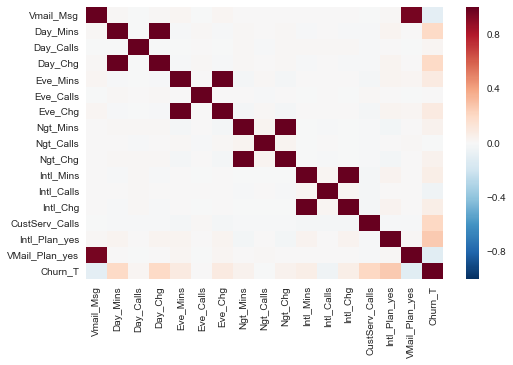

In [103]:
plt.rcParams['figure.figsize'] = 8,5
sns.heatmap(telData_corr,
           xticklabels=telData_corr.columns.values,
           yticklabels=telData_corr.columns.values)

In [104]:
cols_to_consider = telData_final.columns
cols_to_consider.shape

(17,)

In [105]:
cols_to_consider = cols_to_consider.drop('Churn_T')

In [106]:
cols_to_consider = np.array(cols_to_consider)
type(cols_to_consider)
cols_to_consider

numpy.ndarray

array(['Vmail_Msg', 'Day_Mins', 'Day_Calls', 'Day_Chg', 'Eve_Mins',
       'Eve_Calls', 'Eve_Chg', 'Ngt_Mins', 'Ngt_Calls', 'Ngt_Chg',
       'Intl_Mins', 'Intl_Calls', 'Intl_Chg', 'CustServ_Calls',
       'Intl_Plan_yes', 'VMail_Plan_yes'], dtype=object)

In [107]:
# predictors to hold all Input Variables
X = predictors = telData_final.iloc[:,:-1].values.astype(float)

# labels to hold ony target variable
Y = labels = telData_final.Churn_T.values

In [109]:
X
Y

array([[  25. ,  265.1,  110. , ...,    1. ,    0. ,    1. ],
       [  26. ,  161.6,  123. , ...,    1. ,    0. ,    1. ],
       [   0. ,  243.4,  114. , ...,    0. ,    0. ,    0. ],
       ..., 
       [  33. ,  127.5,  126. , ...,    1. ,    0. ,    1. ],
       [  23. ,  168.9,   98. , ...,    0. ,    0. ,    1. ],
       [   0. ,  204.7,  100. , ...,    2. ,    0. ,    0. ]])

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [110]:
X.shape
Y.shape

(4617, 16)

(4617,)

**Will try to apply models on this X and Y first without transforming **

Logistic Regression with & without Cross-Validation

In [111]:
logReg = LogisticRegression(C=1e9)

logReg.fit(X, Y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [112]:
# Predict
Y_pred_logReg = logReg.predict(X)

In [113]:
from sklearn import metrics

In [114]:
score_logReg = logReg.score(X,Y)
score_logReg
metrics.accuracy_score(Y, Y_pred_logReg)
# Above score is same as METRICS ACCURACY

logReg.intercept_
logReg.coef_
list(zip(cols_to_consider, logReg.coef_[0]))

0.86463071258392898

0.86463071258392898

array([-8.12889972])

array([[  3.66120540e-02,   1.97936827e-02,   2.40129502e-03,
         -3.85207239e-02,   7.16315373e-03,  -5.47046869e-04,
         -4.99447303e-03,   4.17860124e-03,  -1.82539539e-03,
         -5.12173759e-03,   7.68827804e-02,  -6.90640701e-02,
          2.80913625e-02,   5.06815409e-01,   2.04016242e+00,
         -2.18922870e+00]])

[('Vmail_Msg', 0.036612054012907333),
 ('Day_Mins', 0.019793682665199274),
 ('Day_Calls', 0.0024012950200643546),
 ('Day_Chg', -0.038520723892086398),
 ('Eve_Mins', 0.0071631537328641593),
 ('Eve_Calls', -0.00054704686897249827),
 ('Eve_Chg', -0.0049944730334842606),
 ('Ngt_Mins', 0.0041786012413880108),
 ('Ngt_Calls', -0.0018253953856611784),
 ('Ngt_Chg', -0.005121737594806137),
 ('Intl_Mins', 0.076882780435866119),
 ('Intl_Calls', -0.069064070054458054),
 ('Intl_Chg', 0.028091362533620261),
 ('CustServ_Calls', 0.50681540879930487),
 ('Intl_Plan_yes', 2.0401624222135903),
 ('VMail_Plan_yes', -2.1892287041098846)]

Getting 86.46% ACCURACY Score when simple LOGISTIC REGRESSION is applied without CROSS Validation on complete Dataset 

In [115]:
Y_df = pd.DataFrame(Y)
Y_df.columns = ['Churn_T']
Y_df['Churn_T_pred_logReg'] = Y_pred_logReg

In [118]:
Y_df.Churn_T.value_counts()
Y_df.Churn_T_pred_logReg.value_counts()

0    3961
1     656
Name: Churn_T, dtype: int64

0    4394
1     223
Name: Churn_T_pred_logReg, dtype: int64

array([[3865,   96],
       [ 529,  127]], dtype=int64)

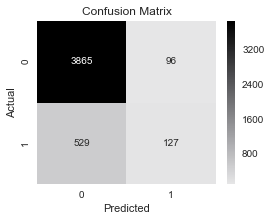

In [119]:
conf_logReg = confusion_matrix(Y, Y_pred_logReg)
conf_logReg
plt.rcParams['figure.figsize'] = 4,3
fun_plot_confusion_matrix(conf_logReg)

In [120]:
fun_conf_mat_calc(conf_logReg)

Overall Accuracy: 86.46
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 19.36
FPRate i.e. (FP / Actyal NO): 2.42
Specificity i.e. (TN / Actual NO): 97.58
Precision i.e. (TP / Predicted YES): 56.95


In [121]:
# Applying 10 Fold CROSS-Validation on this LOGISTIC Regression
score_logReg_CV = cross_val_score(logReg, X, Y, cv=10, scoring='accuracy') # Calculating Accuracy Score
score_logReg_CV
score_logReg_CV.mean()

array([ 0.85529158,  0.88744589,  0.85281385,  0.84632035,  0.88095238,
        0.86147186,  0.85683297,  0.86984816,  0.86550976,  0.86550976])

0.86419965564374146

Getting 86.41% ACCURACY Score when simple LOGISTIC REGRESSION is applied with 10 fold CROSS Validation on complete Dataset

This somewhat helps in avoiding OVERFITTING

In [122]:
Y_pred_logReg_cv = cross_val_predict(logReg, X, Y, cv=10)

In [123]:
Y_df['Churn_T_pred_logReg_CV'] = Y_pred_logReg_cv
for i in Y_df.columns:
    Y_df[i].value_counts()

0    3961
1     656
Name: Churn_T, dtype: int64

0    4394
1     223
Name: Churn_T_pred_logReg, dtype: int64

0    4392
1     225
Name: Churn_T_pred_logReg_CV, dtype: int64

array([[3865,   96],
       [ 529,  127]], dtype=int64)

array([[3863,   98],
       [ 529,  127]], dtype=int64)

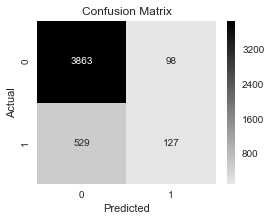

In [124]:
conf_logReg_CV = confusion_matrix(Y, Y_pred_logReg_cv)
conf_logReg
conf_logReg_CV
plt.rcParams['figure.figsize'] = 4,3
fun_plot_confusion_matrix(conf_logReg_CV)

In [125]:
fun_conf_mat_calc(conf_logReg_CV)

Overall Accuracy: 86.42
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 19.36
FPRate i.e. (FP / Actyal NO): 2.47
Specificity i.e. (TN / Actual NO): 97.53
Precision i.e. (TP / Predicted YES): 56.44


**Appying kNN** with and without Cross-Validation

In [127]:
# Find optimal k value in knn
k_range = range(1, 25)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.82477659161129702, 0.88108749209745729, 0.87633354894895454, 0.88954173375119494, 0.88932622055305866, 0.89040425201062945, 0.89343924621703708, 0.89235184254814792, 0.89300353472919447, 0.8917034289171113, 0.89387027261330942, 0.89083621745339392, 0.89105594824803236, 0.88953657508002215, 0.89126958740954054, 0.88888722240249352, 0.89040519105712157, 0.8891041421421898, 0.889971351577729, 0.88758945609392814, 0.88889050298068162, 0.88650673346025266, 0.88823974376159265, 0.88758758002912186]


Text(0.5,0,'Value of K for KNN')

Text(0,0.5,'Cross-Validated Accuracy')

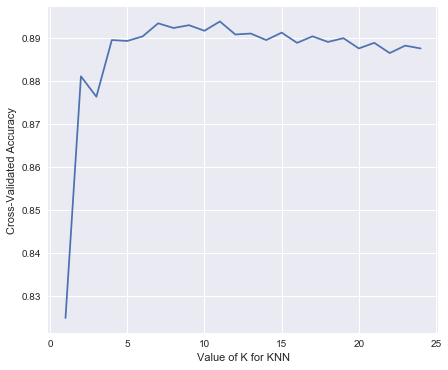

In [128]:
# Plot the value of k for KNN vs cross-validated accuracy
plt.rcParams['figure.figsize'] = 7,6
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Looks that for K = 12 in KNN, accuracy score basis cross-validation is good

In [129]:
# KNN without Cross-Validation
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [130]:
score_knn = knn.score(X,Y)
score_knn

0.8990686593025774

89.9% Accuracy with KNN is certainly more than Logistic Regression with or without CV

In [134]:
Y_pred_knn = knn.predict(X)
Y_df['Churn_T_pred_knn'] = Y_pred_knn

array([[3940,   21],
       [ 445,  211]], dtype=int64)

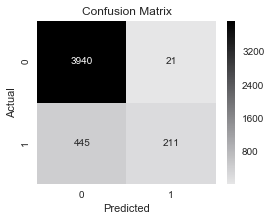

Overall Accuracy: 89.91
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 32.16
FPRate i.e. (FP / Actyal NO): 0.53
Specificity i.e. (TN / Actual NO): 99.47
Precision i.e. (TP / Predicted YES): 90.95


In [135]:
plt.rcParams['figure.figsize'] = 4,3
conf_knn = confusion_matrix(Y, Y_pred_knn)
conf_knn
fun_plot_confusion_matrix(conf_knn)
fun_conf_mat_calc(conf_knn)

In [136]:
#KNN with 10 Fold Cross_Validation to avoid OVREFIT
score_knn_cv = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
score_knn_cv
score_knn_cv.mean()

array([ 0.89632829,  0.9025974 ,  0.86796537,  0.89393939,  0.9025974 ,
        0.88528139,  0.89154013,  0.88503254,  0.89587852,  0.88720174])

0.89083621745339392

In [246]:
# Predict for KNN with cross_val_predict
Y_pred_knn_cv = cross_val_predict(knn, X, Y, cv=10)
Y_df['Churn_T_pred_knn_cv'] = Y_pred_knn_cv

In [247]:
for i in Y_df.columns:
    Y_df[i].value_counts()

0    3961
1     656
Name: Churn_T, dtype: int64

0    4394
1     223
Name: Churn_T_pred_logReg, dtype: int64

0    4392
1     225
Name: Churn_T_pred_logReg_CV, dtype: int64

0    4385
1     232
Name: Churn_T_pred_knn, dtype: int64

0    4397
1     220
Name: Churn_T_pred_knn_cv, dtype: int64

0    4059
1     558
Name: Churn_T_pred_RF1, dtype: int64

0    4056
1     561
Name: Churn_T_pred_RF2, dtype: int64

0    4102
1     515
Name: Churn_T_pred_RF1_cv, dtype: int64

0    4094
1     523
Name: Churn_T_pred_RF2_cv, dtype: int64

0    4056
1     561
Name: Churn_T_pred_RF3_std, dtype: int64

0    4076
1     541
Name: Churn_T_pred_RF4_std_pca, dtype: int64

In [139]:
conf_knn_cv = confusion_matrix(Y, Y_pred_knn_cv)
conf_knn_cv

array([[3927,   34],
       [ 470,  186]], dtype=int64)

In [140]:
for i in [conf_logReg, conf_logReg_CV, conf_knn, conf_knn_cv]:
    i
    fun_conf_mat_calc(i)

array([[3865,   96],
       [ 529,  127]], dtype=int64)

Overall Accuracy: 86.46
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 19.36
FPRate i.e. (FP / Actyal NO): 2.42
Specificity i.e. (TN / Actual NO): 97.58
Precision i.e. (TP / Predicted YES): 56.95


array([[3863,   98],
       [ 529,  127]], dtype=int64)

Overall Accuracy: 86.42
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 19.36
FPRate i.e. (FP / Actyal NO): 2.47
Specificity i.e. (TN / Actual NO): 97.53
Precision i.e. (TP / Predicted YES): 56.44


array([[3940,   21],
       [ 445,  211]], dtype=int64)

Overall Accuracy: 89.91
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 32.16
FPRate i.e. (FP / Actyal NO): 0.53
Specificity i.e. (TN / Actual NO): 99.47
Precision i.e. (TP / Predicted YES): 90.95


array([[3927,   34],
       [ 470,  186]], dtype=int64)

Overall Accuracy: 89.08
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 28.35
FPRate i.e. (FP / Actyal NO): 0.86
Specificity i.e. (TN / Actual NO): 99.14
Precision i.e. (TP / Predicted YES): 84.55


**Till now, with Log-Reg and KNN via non-CV and with CV, KNN for 12 neighbours with CV=10 folds, results looks good**

KNN with Cross-Validation handles OVERFIT as well in complete Dataset with good Accuracy of Scores along with Recall & Precision also being improved

In [141]:
# RandomForest will itself avoid Overfit which single DecisionTree does not avoid
# RF_1 with GINI INDEX
RF_1 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, random_state=4)
RF_1.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=4, verbose=0, warm_start=False)

In [142]:
score_RF1 = RF_1.score(X,Y)
score_RF1
Y_pred_RF1 = RF_1.predict(X)
Y_df['Churn_T_pred_RF1'] = Y_pred_RF1
conf_RF1 = confusion_matrix(Y, Y_pred_RF1)
conf_RF1

0.9787740957331601

array([[3961,    0],
       [  98,  558]], dtype=int64)

In [143]:
# RF_2 with ENTROPY
RF_2 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, random_state=4)
RF_2.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=4, verbose=0, warm_start=False)

In [144]:
score_RF2 = RF_2.score(X,Y)
score_RF2
Y_pred_RF2 = RF_2.predict(X)
Y_df['Churn_T_pred_RF2'] = Y_pred_RF2
conf_RF2 = confusion_matrix(Y, Y_pred_RF2)
conf_RF2

0.97942386831275718

array([[3961,    0],
       [  95,  561]], dtype=int64)

**Random Forest with Cross-Validation will avoid OVERFIT**

In [145]:
# RandofmForest with 10 Fold Cross-Validation
score_RF1_cv = cross_val_score(RF_1, X, Y, cv = 10)
score_RF1_cv.mean()

0.95733062587773221

In [146]:
score_RF2_cv = cross_val_score(RF_2, X, Y, cv = 10)
score_RF2_cv.mean()

0.9564685730851874

In [147]:
Y_pred_RF1_cv = cross_val_predict(RF_1, X, Y, cv = 10)
Y_df['Churn_T_pred_RF1_cv'] = Y_pred_RF1_cv
conf_RF1_cv = confusion_matrix(Y, Y_pred_RF1_cv)
conf_RF1_cv

array([[3933,   28],
       [ 169,  487]], dtype=int64)

In [148]:
Y_pred_RF2_cv = cross_val_predict(RF_2, X, Y, cv = 10)
Y_df['Churn_T_pred_RF2_cv'] = Y_pred_RF2_cv
conf_RF2_cv = confusion_matrix(Y, Y_pred_RF2_cv)
conf_RF2_cv

array([[3927,   34],
       [ 167,  489]], dtype=int64)

In [149]:
for i in [conf_logReg, conf_logReg_CV, conf_knn, conf_knn_cv, conf_RF1, conf_RF1_cv, conf_RF2, conf_RF2_cv]:
    i
    fun_conf_mat_calc(i)

array([[3865,   96],
       [ 529,  127]], dtype=int64)

Overall Accuracy: 86.46
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 19.36
FPRate i.e. (FP / Actyal NO): 2.42
Specificity i.e. (TN / Actual NO): 97.58
Precision i.e. (TP / Predicted YES): 56.95


array([[3863,   98],
       [ 529,  127]], dtype=int64)

Overall Accuracy: 86.42
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 19.36
FPRate i.e. (FP / Actyal NO): 2.47
Specificity i.e. (TN / Actual NO): 97.53
Precision i.e. (TP / Predicted YES): 56.44


array([[3940,   21],
       [ 445,  211]], dtype=int64)

Overall Accuracy: 89.91
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 32.16
FPRate i.e. (FP / Actyal NO): 0.53
Specificity i.e. (TN / Actual NO): 99.47
Precision i.e. (TP / Predicted YES): 90.95


array([[3927,   34],
       [ 470,  186]], dtype=int64)

Overall Accuracy: 89.08
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 28.35
FPRate i.e. (FP / Actyal NO): 0.86
Specificity i.e. (TN / Actual NO): 99.14
Precision i.e. (TP / Predicted YES): 84.55


array([[3961,    0],
       [  98,  558]], dtype=int64)

Overall Accuracy: 97.88
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 85.06
FPRate i.e. (FP / Actyal NO): 0.0
Specificity i.e. (TN / Actual NO): 100.0
Precision i.e. (TP / Predicted YES): 100.0


array([[3933,   28],
       [ 169,  487]], dtype=int64)

Overall Accuracy: 95.73
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 74.24
FPRate i.e. (FP / Actyal NO): 0.71
Specificity i.e. (TN / Actual NO): 99.29
Precision i.e. (TP / Predicted YES): 94.56


array([[3961,    0],
       [  95,  561]], dtype=int64)

Overall Accuracy: 97.94
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 85.52
FPRate i.e. (FP / Actyal NO): 0.0
Specificity i.e. (TN / Actual NO): 100.0
Precision i.e. (TP / Predicted YES): 100.0


array([[3927,   34],
       [ 167,  489]], dtype=int64)

Overall Accuracy: 95.65
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 74.54
FPRate i.e. (FP / Actyal NO): 0.86
Specificity i.e. (TN / Actual NO): 99.14
Precision i.e. (TP / Predicted YES): 93.5


Till now, without applying PCA or any scaling/standaridization on X, RF-2 (Entropy) with 10 Fold Cross-Validation looks to give best result with 95.65 Accuracy

**Need to apply further Standard Scaler / MinMaxScaler and then PCA on this**

Post this, we again need to RUN all above models to get details

In [150]:
# StandardScaler
scaler = StandardScaler()

In [153]:
X_std = scaler.fit_transform(X)
X.shape
X_std.shape
X[:2]
X_std[:2]

(4617, 16)

(4617, 16)

array([[  25.  ,  265.1 ,  110.  ,   45.07,  197.4 ,   99.  ,   16.78,
         244.7 ,   91.  ,   11.01,   10.  ,    3.  ,    2.7 ,    1.  ,
           0.  ,    1.  ],
       [  26.  ,  161.6 ,  123.  ,   27.47,  195.5 ,  103.  ,   16.62,
         254.4 ,  103.  ,   11.45,   13.7 ,    3.  ,    3.7 ,    1.  ,
           0.  ,    1.  ]])

array([[ 1.26188457,  1.56829318,  0.50026149,  1.56856871, -0.05992081,
        -0.05952674, -0.05974201,  0.87213469, -0.44871155,  0.87141811,
        -0.10130125, -0.58348728, -0.10200542, -0.43388538, -0.32699969,
         1.65391562],
       [ 1.33546342, -0.34916557,  1.15415628, -0.34944668, -0.09750622,
         0.14229809, -0.09697845,  1.06406894,  0.15330842,  1.06488923,
         1.24070665, -0.58348728,  1.24148062, -0.43388538, -0.32699969,
         1.65391562]])

In [154]:
X_std.std()
X_std.mean()

1.0

1.0977188883287502e-17

**Principal Component Analysis** on this X_std for dimensionality reduction and work with critical PC Factors only

In [161]:
pca = PCA()

In [162]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [163]:
# Creating Function for plotting Variance Ratio
def fun_plot_variance_ratio_cumsum(variance_ratio):
    variance_ratio_cumsum = np.cumsum(np.round(variance_ratio, decimals=4)*100)
    print(variance_ratio_cumsum)
    
    plt.rcParams['figure.figsize'] = 6,4
    plt.plot(variance_ratio_cumsum)
    plt.title("Cumulative Variance")
    plt.xlabel("No. of Components")
    plt.ylabel("Variance Explained")

In [164]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([  1.28919028e-01,   1.25887597e-01,   1.24910446e-01,
         1.23581533e-01,   1.19743714e-01,   6.42711819e-02,
         6.39513233e-02,   6.21291752e-02,   6.19561733e-02,
         6.11796422e-02,   6.06818385e-02,   2.78782248e-03,
         4.59037154e-07,   4.91703368e-08,   1.40175869e-08,
         3.05399944e-09])

[  12.89   25.48   37.97   50.33   62.3    68.73   75.13   81.34   87.54
   93.66   99.73  100.01  100.01  100.01  100.01  100.01]


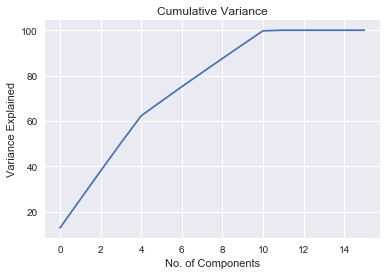

In [165]:
fun_plot_variance_ratio_cumsum(variance_ratio)

From above, 10 PCA variables themselves fulfill 93% variance, thus will use only these 10 Transformed variables

In [166]:
X_pca = PCA(n_components=10)
X_pca

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [202]:
# Fit X_std with 10 Components only
X_std_pca = X_pca.fit(X_std)
#X_std_pca.shape
X_std.shape
X_std_pca

(4617, 16)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [170]:
# Getting Transformed Vectors with these 10 PC Variables which will be fresh set of Input PC Variables
transformed_vectors = X_pca.transform(X_std)
transformed_vectors.shape

(4617, 10)

In [177]:
transformed_vectors[0:2]
transformed_vectors.shape
X_std[0:2]
X_std.shape

array([[ 1.47232754,  1.8841186 ,  2.05246553, -0.39561092,  0.7615826 ,
        -0.20609898,  0.36255075, -0.77783754, -0.12673411, -0.48464123],
       [-0.16818961, -0.58965539,  2.8506351 ,  0.84881189,  0.98250051,
         0.09892099,  0.44553667, -0.72380762, -0.33414251, -0.04107178]])

(4617, 10)

array([[ 1.26188457,  1.56829318,  0.50026149,  1.56856871, -0.05992081,
        -0.05952674, -0.05974201,  0.87213469, -0.44871155,  0.87141811,
        -0.10130125, -0.58348728, -0.10200542, -0.43388538, -0.32699969,
         1.65391562],
       [ 1.33546342, -0.34916557,  1.15415628, -0.34944668, -0.09750622,
         0.14229809, -0.09697845,  1.06406894,  0.15330842,  1.06488923,
         1.24070665, -0.58348728,  1.24148062, -0.43388538, -0.32699969,
         1.65391562]])

(4617, 16)

In [216]:
# Running Logistic Regression on these STANDARDIZED and 10 PCA transformed Vectors
logReg_std_pca = LogisticRegression(C=1e9)
logReg_std_pca

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [213]:
# FITTING model on PCA base TRANASFORMED Vectors (10) and Y 
logReg_std_pca.fit(transformed_vectors, Y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [214]:
score_logReg_std_pca = logReg_std_pca.score(transformed_vectors, Y)
score_logReg_std_pca

0.86593025774312327

In [215]:
score_logReg, score_logReg_CV.mean()

(0.86463071258392898, 0.86419965564374146)

Score is improved to 86.59% when Logistic-Regression is applied on STANDARIDIZED X and then considering only 10 PCA tranformed vectors on these standardized X

In [217]:
# Re-Running Logistic Regression on these STANDARDIZED and 10 PCA transformed Vectors + 
# using 10 Fold Cross-Validation on this to avoid OVERFIT, if any
score_logReg_std_pca_cv = cross_val_score(logReg_std, transformed_vectors, Y, cv=10).mean()
score_logReg_std_pca_cv

0.86615145972140584

Score is improved to slightly 86.61% here

Now, let's check if Ranndom-Forest classification further improves this score when same STANDARDIZED X and 10 PCA Transformed Vectors are used here 

In [222]:
# Random-Forest on Standaridized X only (Without PCA or CV)
RF_3_std = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, random_state=4)
RF_3_std.fit(X_std, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=4, verbose=0, warm_start=False)

In [219]:
score_RF3_std = RF_3_std.score(X_std, Y)
score_RF3_std

0.97942386831275718

In [221]:
score_RF1, score_RF1_cv.mean(), score_RF2, score_RF2_cv.mean()

(0.9787740957331601,
 0.95733062587773221,
 0.97942386831275718,
 0.9564685730851874)

Basis above, we are getting best accuracy as 97.94% when Random-Forest is applied only with STANDARDIZED X

Let's check the confusion Matrix here

In [236]:
Y_pred_RF3_std = RF_3_std.predict(X_std)
Y_df['Churn_T_pred_RF3_std'] = Y_pred_RF3_std
fun_Y_df_col_value_counts()

Churn_T
0    3961
1     656
Name: Churn_T, dtype: int64


Churn_T_pred_logReg
0    4394
1     223
Name: Churn_T_pred_logReg, dtype: int64


Churn_T_pred_logReg_CV
0    4392
1     225
Name: Churn_T_pred_logReg_CV, dtype: int64


Churn_T_pred_knn
0    4385
1     232
Name: Churn_T_pred_knn, dtype: int64


Churn_T_pred_knn_cv
0    4392
1     225
Name: Churn_T_pred_knn_cv, dtype: int64


Churn_T_pred_RF1
0    4059
1     558
Name: Churn_T_pred_RF1, dtype: int64


Churn_T_pred_RF2
0    4056
1     561
Name: Churn_T_pred_RF2, dtype: int64


Churn_T_pred_RF1_cv
0    4102
1     515
Name: Churn_T_pred_RF1_cv, dtype: int64


Churn_T_pred_RF2_cv
0    4094
1     523
Name: Churn_T_pred_RF2_cv, dtype: int64


Churn_T_pred_RF3_std
0    4056
1     561
Name: Churn_T_pred_RF3_std, dtype: int64




array([[3961,    0],
       [  95,  561]], dtype=int64)

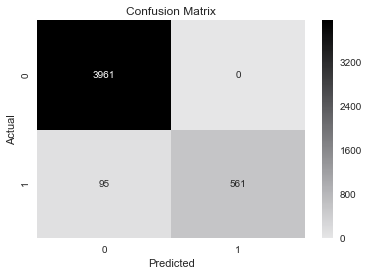

Overall Accuracy: 97.94
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 85.52
FPRate i.e. (FP / Actyal NO): 0.0
Specificity i.e. (TN / Actual NO): 100.0
Precision i.e. (TP / Predicted YES): 100.0


In [237]:
conf_RF3_std = confusion_matrix(Y, Y_pred_RF3_std)
conf_RF3_std
fun_plot_confusion_matrix(conf_RF3_std)
fun_conf_mat_calc(conf_RF3_std)

Basis above Confusion-Matrix for RF_3_std, resluts are pretty good since Overall Accuracy is 97.94%.
TPR i.e. Recall has improved to 85.52% and FPR = 0, which is good though model looks slight Overfit since both specificity & precision is 100%

Will try to push Random-Forest with STANDARDIZED X for 10 TRANSFORMED VECTORS derived via PCA and 10-Fold Cross Validation to avoid all type of Overfit

In [249]:
# Random-Forest with standardized X and 10 Transformed Vectors via PCA (without CV)
RF_4_std_pca = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_depth=10, random_state=4)
RF_4_std_pca.fit(transformed_vectors, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=4, verbose=0, warm_start=False)

In [251]:
# Score and Predicted results
score_RF4_std_pca = RF_4_std_pca.score(transformed_vectors, Y)
score_RF4_std_pca

Y_pred_RF4_std_pca = RF_4_std_pca.predict(transformed_vectors)
Y_df['Churn_T_pred_RF4_std_pca'] = Y_pred_RF4_std_pca

fun_Y_df_col_value_counts()

0.97509205111544295

Churn_T
0    3961
1     656
Name: Churn_T, dtype: int64


Churn_T_pred_logReg
0    4394
1     223
Name: Churn_T_pred_logReg, dtype: int64


Churn_T_pred_logReg_CV
0    4392
1     225
Name: Churn_T_pred_logReg_CV, dtype: int64


Churn_T_pred_knn
0    4385
1     232
Name: Churn_T_pred_knn, dtype: int64


Churn_T_pred_knn_cv
0    4397
1     220
Name: Churn_T_pred_knn_cv, dtype: int64


Churn_T_pred_RF1
0    4059
1     558
Name: Churn_T_pred_RF1, dtype: int64


Churn_T_pred_RF2
0    4056
1     561
Name: Churn_T_pred_RF2, dtype: int64


Churn_T_pred_RF1_cv
0    4102
1     515
Name: Churn_T_pred_RF1_cv, dtype: int64


Churn_T_pred_RF2_cv
0    4094
1     523
Name: Churn_T_pred_RF2_cv, dtype: int64


Churn_T_pred_RF3_std
0    4056
1     561
Name: Churn_T_pred_RF3_std, dtype: int64


Churn_T_pred_RF4_std_pca
0    4076
1     541
Name: Churn_T_pred_RF4_std_pca, dtype: int64




array([[3961,    0],
       [ 115,  541]], dtype=int64)

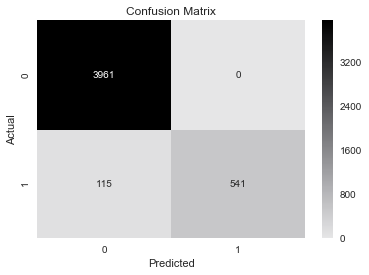

Overall Accuracy: 97.51
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 82.47
FPRate i.e. (FP / Actyal NO): 0.0
Specificity i.e. (TN / Actual NO): 100.0
Precision i.e. (TP / Predicted YES): 100.0


In [253]:
# COnfusion Matrix
conf_RF4_std_pca = confusion_matrix(Y, Y_pred_RF4_std_pca)
conf_RF4_std_pca

fun_plot_confusion_matrix(conf_RF4_std_pca)

fun_conf_mat_calc(conf_RF4_std_pca)

In [259]:
for i in [conf_RF1_cv, conf_RF2_cv, conf_RF3_std, conf_RF4_std_pca]:
    i

for j in [score_RF1_cv.mean(), score_RF2_cv.mean(), score_RF3_std, score_RF4_std_pca]:
    j

array([[3933,   28],
       [ 169,  487]], dtype=int64)

array([[3927,   34],
       [ 167,  489]], dtype=int64)

array([[3961,    0],
       [  95,  561]], dtype=int64)

array([[3961,    0],
       [ 115,  541]], dtype=int64)

0.95733062587773221

0.9564685730851874

0.97942386831275718

0.97509205111544295

In [266]:
del(RF_5_std_cv)

In [267]:
RF_5_std_cv = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, random_state=4)

In [269]:
score_RF5_std_cv = cross_val_score(RF_5_std_cv, X_std, Y, cv=10, scoring='accuracy')

In [270]:
score_RF5_std_cv.mean()

0.9564685730851874

In [276]:
# Predicted Results
Y_pred_RF5_std_cv = cross_val_predict(RF_5_std_cv, X_std, Y, cv=10)

In [277]:
Y_df['Churn_T_pred_RF5_std_cv'] = Y_pred_RF5_std_cv

fun_Y_df_col_value_counts()

Churn_T
0    3961
1     656
Name: Churn_T, dtype: int64


Churn_T_pred_logReg
0    4394
1     223
Name: Churn_T_pred_logReg, dtype: int64


Churn_T_pred_logReg_CV
0    4392
1     225
Name: Churn_T_pred_logReg_CV, dtype: int64


Churn_T_pred_knn
0    4385
1     232
Name: Churn_T_pred_knn, dtype: int64


Churn_T_pred_knn_cv
0    4397
1     220
Name: Churn_T_pred_knn_cv, dtype: int64


Churn_T_pred_RF1
0    4059
1     558
Name: Churn_T_pred_RF1, dtype: int64


Churn_T_pred_RF2
0    4056
1     561
Name: Churn_T_pred_RF2, dtype: int64


Churn_T_pred_RF1_cv
0    4102
1     515
Name: Churn_T_pred_RF1_cv, dtype: int64


Churn_T_pred_RF2_cv
0    4094
1     523
Name: Churn_T_pred_RF2_cv, dtype: int64


Churn_T_pred_RF3_std
0    4056
1     561
Name: Churn_T_pred_RF3_std, dtype: int64


Churn_T_pred_RF4_std_pca
0    4076
1     541
Name: Churn_T_pred_RF4_std_pca, dtype: int64


Churn_T_pred_RF5_std_cv
0    4094
1     523
Name: Churn_T_pred_RF5_std_cv, dtype: int64




array([[3927,   34],
       [ 167,  489]], dtype=int64)

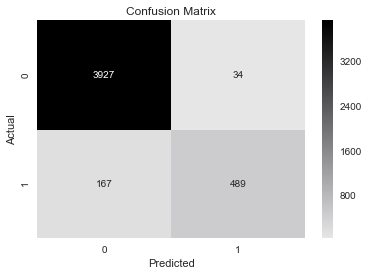

Overall Accuracy: 95.65
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 74.54
FPRate i.e. (FP / Actyal NO): 0.86
Specificity i.e. (TN / Actual NO): 99.14
Precision i.e. (TP / Predicted YES): 93.5


In [279]:
# Confusion Matrix
conf_RF5_std_cv = confusion_matrix(Y, Y_pred_RF5_std_cv)
conf_RF5_std_cv

fun_plot_confusion_matrix(conf_RF5_std_cv)

fun_conf_mat_calc(conf_RF5_std_cv)

In [280]:
# STD + PCA + CV
RF_6_std_pca_cv = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, random_state=4)
RF_6_std_pca_cv

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=4, verbose=0, warm_start=False)

In [288]:
# Using PCA with 10 Transformed Vectors and CV
score_RF6_std_pca_cv = cross_val_score(RF_6_std_pca_cv, transformed_vectors, Y, cv=10, scoring='accuracy')

In [289]:
score_RF6_std_pca_cv
score_RF6_std_pca_cv.mean()

array([ 0.91360691,  0.91558442,  0.91558442,  0.93073593,  0.93506494,
        0.92640693,  0.93058568,  0.92624729,  0.9197397 ,  0.92190889])

0.9235465096645834

In [290]:
# Predicted Results
Y_pred_RF6_std_pca_cv = cross_val_predict(RF_6_std_pca_cv, transformed_vectors, Y, cv=10)

In [291]:
Y_df['Churn_T_pred_RF6_std_pca_cv'] = Y_pred_RF6_std_pca_cv
fun_Y_df_col_value_counts()

Churn_T
0    3961
1     656
Name: Churn_T, dtype: int64


Churn_T_pred_logReg
0    4394
1     223
Name: Churn_T_pred_logReg, dtype: int64


Churn_T_pred_logReg_CV
0    4392
1     225
Name: Churn_T_pred_logReg_CV, dtype: int64


Churn_T_pred_knn
0    4385
1     232
Name: Churn_T_pred_knn, dtype: int64


Churn_T_pred_knn_cv
0    4397
1     220
Name: Churn_T_pred_knn_cv, dtype: int64


Churn_T_pred_RF1
0    4059
1     558
Name: Churn_T_pred_RF1, dtype: int64


Churn_T_pred_RF2
0    4056
1     561
Name: Churn_T_pred_RF2, dtype: int64


Churn_T_pred_RF1_cv
0    4102
1     515
Name: Churn_T_pred_RF1_cv, dtype: int64


Churn_T_pred_RF2_cv
0    4094
1     523
Name: Churn_T_pred_RF2_cv, dtype: int64


Churn_T_pred_RF3_std
0    4056
1     561
Name: Churn_T_pred_RF3_std, dtype: int64


Churn_T_pred_RF4_std_pca
0    4076
1     541
Name: Churn_T_pred_RF4_std_pca, dtype: int64


Churn_T_pred_RF5_std_cv
0    4094
1     523
Name: Churn_T_pred_RF5_std_cv, dtype: int64


Churn_T_pred_RF6_std_pca_cv
0   

array([[3927,   34],
       [ 319,  337]], dtype=int64)

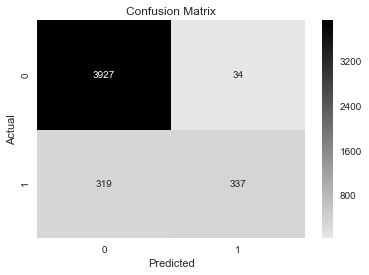

Overall Accuracy: 92.35
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 51.37
FPRate i.e. (FP / Actyal NO): 0.86
Specificity i.e. (TN / Actual NO): 99.14
Precision i.e. (TP / Predicted YES): 90.84


In [292]:
# COnfusion Matrix
conf_RF6_std_pca_cv = confusion_matrix(Y, Y_pred_RF6_std_pca_cv)
conf_RF6_std_pca_cv

fun_plot_confusion_matrix(conf_RF6_std_pca_cv)

fun_conf_mat_calc(conf_RF6_std_pca_cv)

In [314]:
for i in [conf_RF1_cv, conf_RF2_cv, conf_RF3_std, conf_RF4_std_pca, conf_RF5_std_cv, conf_RF6_std_pca_cv]:
    i
    fun_conf_mat_calc(i)
    print('\n')

array([[3933,   28],
       [ 169,  487]], dtype=int64)

Overall Accuracy: 95.73
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 74.24
FPRate i.e. (FP / Actyal NO): 0.71
Specificity i.e. (TN / Actual NO): 99.29
Precision i.e. (TP / Predicted YES): 94.56




array([[3927,   34],
       [ 167,  489]], dtype=int64)

Overall Accuracy: 95.65
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 74.54
FPRate i.e. (FP / Actyal NO): 0.86
Specificity i.e. (TN / Actual NO): 99.14
Precision i.e. (TP / Predicted YES): 93.5




array([[3961,    0],
       [  95,  561]], dtype=int64)

Overall Accuracy: 97.94
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 85.52
FPRate i.e. (FP / Actyal NO): 0.0
Specificity i.e. (TN / Actual NO): 100.0
Precision i.e. (TP / Predicted YES): 100.0




array([[3961,    0],
       [ 115,  541]], dtype=int64)

Overall Accuracy: 97.51
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 82.47
FPRate i.e. (FP / Actyal NO): 0.0
Specificity i.e. (TN / Actual NO): 100.0
Precision i.e. (TP / Predicted YES): 100.0




array([[3927,   34],
       [ 167,  489]], dtype=int64)

Overall Accuracy: 95.65
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 74.54
FPRate i.e. (FP / Actyal NO): 0.86
Specificity i.e. (TN / Actual NO): 99.14
Precision i.e. (TP / Predicted YES): 93.5




array([[3927,   34],
       [ 319,  337]], dtype=int64)

Overall Accuracy: 92.35
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 51.37
FPRate i.e. (FP / Actyal NO): 0.86
Specificity i.e. (TN / Actual NO): 99.14
Precision i.e. (TP / Predicted YES): 90.84




Finally, considering all applied models here, we shall consider RF5_std_cv i.e. RandomForest applied on Standardized X with 10 Fold Cross-Validation. Reasons below:

1. Considering RandomForest with 100 DecisionTrees helps already in avoiding Overfitting
2. X values as Predictors are not in standardized scale, thus this model uses converted standardized X for better model analysis
3. 10 Fold Cross Validation on this further reduces any sort of OVERFIT on this model, thus making model more realistic
4. Accuracy for this comes to be 95.65 which is pretty good
5. Basis Confusion Matrix, we can see that Recall (True-Positive-Rate) is around 75%, which is more realistic
6. False-Positive-Rate is also very low i.e. 0.84%
7. Overall Specificity and Precision is also at 99% & 93% respectively which is preety good

Though from all above, maximum accuracy as 97.94% is given by conf_RF3_std i.e. RandomForest applied only on Standardized X without Cross-Validation or PCA, but, this looks heavily OVERFIT since False-Positive-Rate is 0 and seems mimicing our Dataset. Thus, we are not considering it.